# data stats

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path

In [21]:
def simple_plot(names, series, legends, title='', save=None, figsize=(20, 4)):
    assert len(series) == len(legends)
    fig, ax = plt.subplots(figsize=figsize)
    sers = []
    mn, mx = float('inf'), float('-inf')
    for ser, leg in zip(series, legends):
        sers.append(ax.plot(names, ser, 'o', label=leg)[0])
        mn, mx = min(mn, min(ser)), max(mx, max(ser))
    
    plt.ylim((mn/10, mx*10))
    plt.legend(sers, [s.get_label() for s in sers])
    plt.yscale('log')
    plt.xticks(rotation=90, fontsize=12)
    plt.tight_layout()
    plt.margins(x=0.01)
    plt.title(title)
    if save:
        print(f'saving to {save}')
        plt.savefig(save)
    plt.show()

def plot_lang_stats(stats, chunk_size=100, max_stats=500, saveas=None, figsize=(20, 4)):
    names_all = list(sorted(stats.keys(), reverse=True, key=lambda l:lang_stat[l][2]))
    for start in range(0, min(max_stats, len(stats)), chunk_size):
        names = names_all[start:start+chunk_size]
        sents = [stats[n][0] for n in names]
        src_toks = [stats[n][1] for n in names]
        eng_toks = [stats[n][2] for n in names]
        save_chunk = None
        if saveas:
            assert len(saveas.split('.')) == 2 # only one dot allowed
            save_chunk = saveas.replace('.', f'-{start+1}.')
        sns.set(font="Serif", style='white',font_scale=1.1)
        simple_plot(names, series=[src_toks, eng_toks, sents], 
                    legends=['Source Tokens', 'English Tokens', 'Sentences'],
                    title=f'Languages {start}-{start+len(names)}',
                   save=save_chunk, figsize=figsize)

In [15]:
def read_stats(path):
    with path.open('r') as f:
        lines = [l.strip().split('\t') for l in f]

    assert lines[0] == ["Lang", "Sents", "Source", "English"]  # header
    assert len(lines[-2]) == 1 and lines[-2][0] == ''  # empty line before total
    assert lines[-1][0] == 'Total' # total
    recs = lines[1:-2]
    recs = {rec[0]: [int(x) for x in rec[1:]] for rec in recs}
    return recs


stats_file  = Path('stats/train.good.dedup.notest.ascitgt.tok.stats.tsv')
lang_stat = read_stats(stats_file)

saving to viz2/lang-stats-1-100.pdf


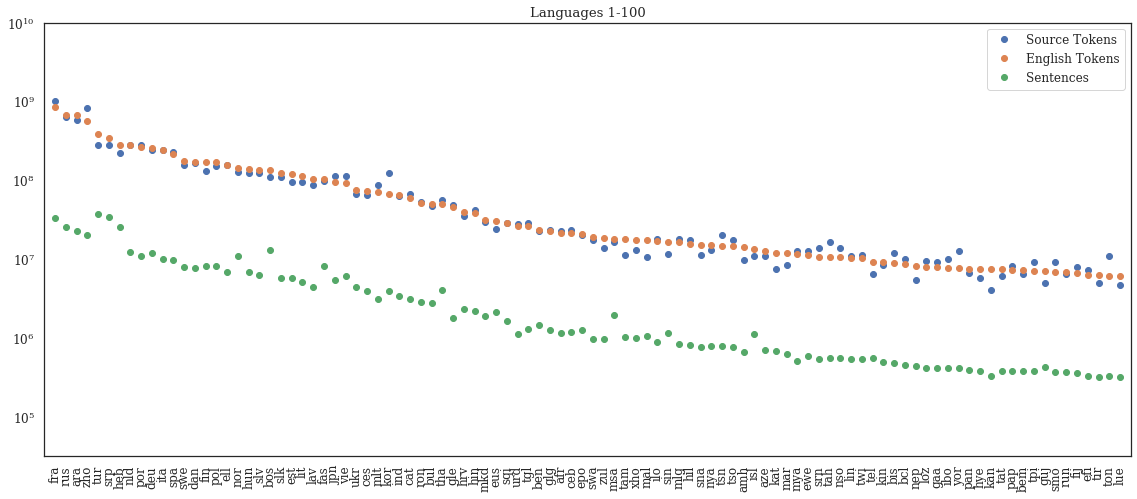

saving to viz2/lang-stats-101-200.pdf


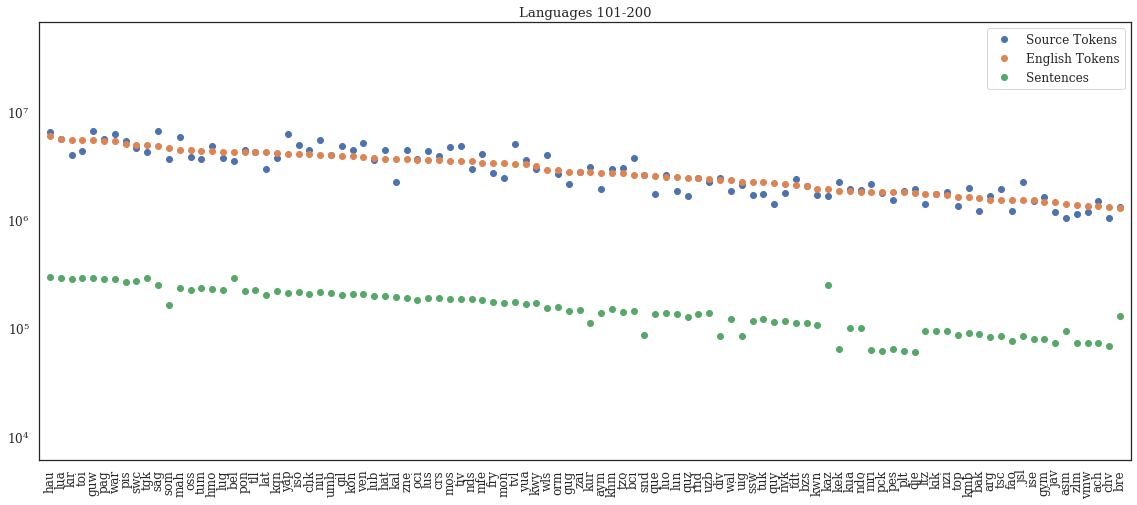

saving to viz2/lang-stats-201-300.pdf


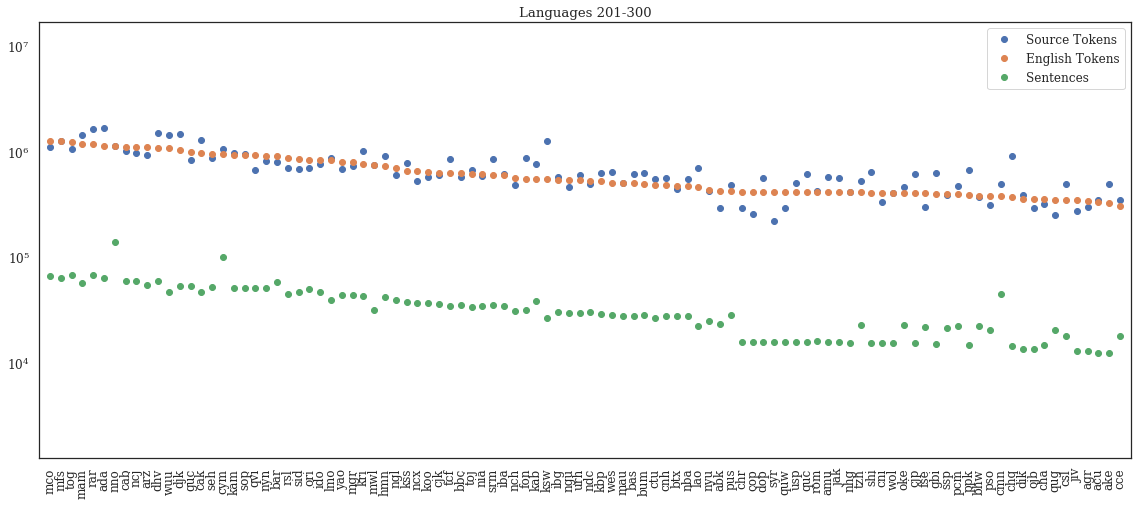

saving to viz2/lang-stats-301-400.pdf


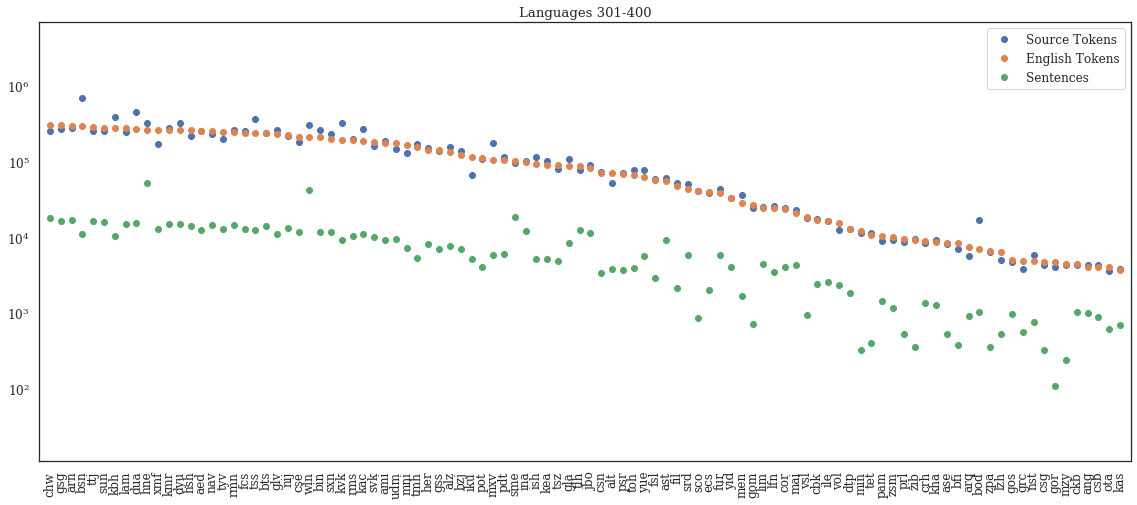

saving to viz2/lang-stats-401-500.pdf


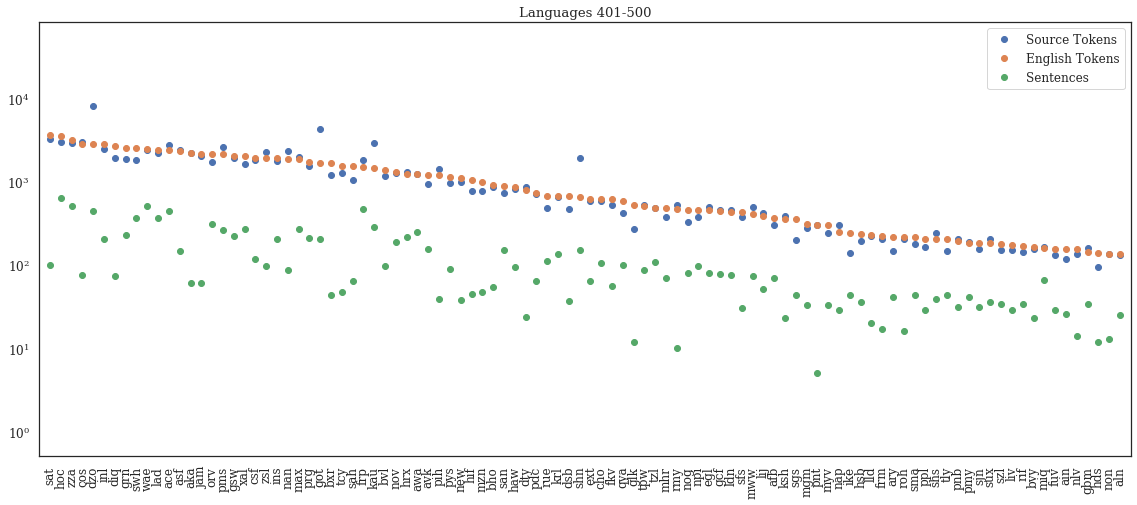

In [26]:
chunk_size=100
for start in range(0, min(500, len(lang_stat)), chunk_size):
    names = list(sorted(lang_stat.keys(), reverse=True, 
                        key=lambda l:lang_stat[l][2]))[start:start+chunk_size]
    sents = [lang_stat[n][0] for n in names]
    src_toks = [lang_stat[n][1] for n in names]
    eng_toks = [lang_stat[n][2] for n in names]

    sns.set(font="Serif", style='white',font_scale=1.1)
    simple_plot(names, series=[src_toks, eng_toks, sents], 
                legends=['Source Tokens', 'English Tokens', 'Sentences'],
                title=f'Languages {start+1}-{start+len(names)}',
               save=f'viz2/lang-stats-{start+1}-{start+len(names)}.pdf', figsize=(16, 7))